**Task 3: Modeling and Forecasting (2025-2027)** Predict the "Account Ownership Rate" for the next 3 years. Given the small number of historical data points, we will use a Regression approach that factors in the cumulative effect of "active events" (policies/launches).

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
try:
    df = pd.read_csv('/content/ethiopia_fi_enriched.csv')
    print("✅ All datasets loaded successfully!")
except FileNotFoundError:
    print("Error: Files not found. Please ensure they are in the working directory.")

✅ All datasets loaded successfully!


In [47]:
years = pd.DataFrame({'year': range(2014, 2028)})

In [48]:
target_data = observations[observations['indicator_code'] == 'ACC_OWNERSHIP'][['year', 'value_numeric']]
ts_df = years.merge(target_data, on='year', how='left')

In [49]:
ts_df['value_interp'] = ts_df['value_numeric'].interpolate(method='linear')

In [50]:
ts_df['event_intensity'] = 0

for year in ts_df['year']:
    # Count events that happened on or before this year
    active_events = events[events['year'] <= year].shape[0]
    ts_df.loc[ts_df['year'] == year, 'event_intensity'] = active_events

In [51]:
train_df = ts_df[ts_df['year'] <= 2024].dropna(subset=['value_interp'])
X_train = train_df[['year', 'event_intensity']]
y_train = train_df['value_interp']

In [52]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [53]:
future_df = ts_df[ts_df['year'] > 2024]
X_future = future_df[['year', 'event_intensity']]

In [54]:
predictions = model.predict(X_future)
ts_df.loc[ts_df['year'] > 2024, 'forecast'] = predictions

In [55]:
print("Forecast Results (Account Ownership %):")
print(ts_df[ts_df['year'] >= 2024][['year', 'value_numeric', 'forecast']])

Forecast Results (Account Ownership %):
    year  value_numeric   forecast
12  2024           49.0        NaN
13  2025            NaN  46.062416
14  2026            NaN  49.378315
15  2027            NaN  52.694213


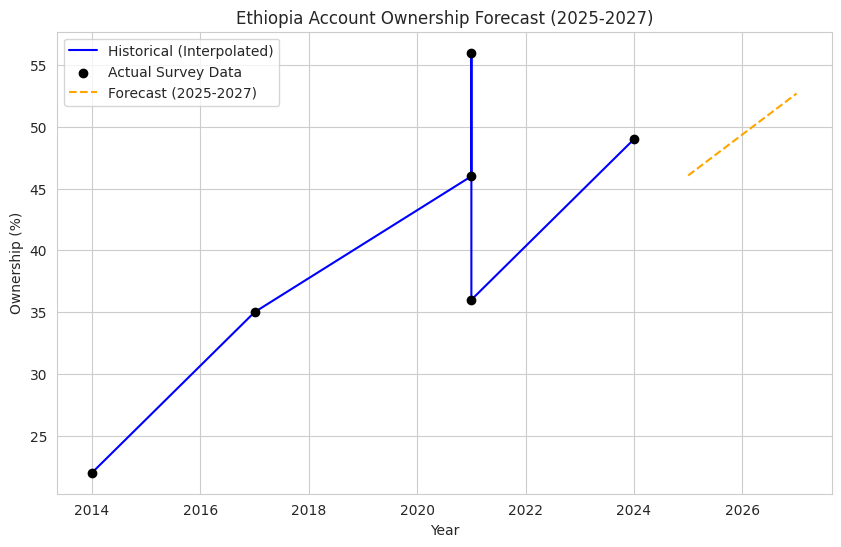

In [56]:
plt.figure(figsize=(10, 6))
plt.plot(train_df['year'], train_df['value_interp'], label='Historical (Interpolated)', color='blue')
plt.scatter(ts_df['year'], ts_df['value_numeric'], label='Actual Survey Data', color='black', zorder=5)
plt.plot(future_df['year'], predictions, label='Forecast (2025-2027)', color='orange', linestyle='--')
plt.title("Ethiopia Account Ownership Forecast (2025-2027)")
plt.xlabel("Year")
plt.ylabel("Ownership (%)")
plt.legend()
plt.show()